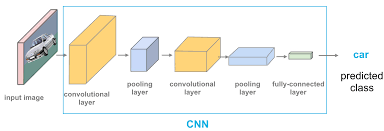
# Convolutional Neural Network

#### Data Source: https://drive.google.com/drive/folders/15SG-chdqEwcrNAY39RTZJjvl-UwiZo_e?usp=sharing

### Importing the libraries

In [38]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

#### Specifying the TensorFlow version

In [39]:
tf.__version__

'2.3.0'

#### Testing for GPU


In [40]:
import tensorflow as tf
tf.test.gpu_device_name()

''

#### Mounting Google Drive locally

In [41]:
from google.colab import drive
drive.mount('/content/data')

Drive already mounted at /content/data; to attempt to forcibly remount, call drive.mount("/content/data", force_remount=True).


In [42]:
import os
os.chdir('/content/data/My Drive/KRISHNA/CNN')

## Data Preprocessing

#### Preprocessing the Training set

In [43]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 4000 images belonging to 2 classes.


#### Preprocessing the Test set

In [44]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 1000 images belonging to 2 classes.


## Building the CNN

#### Initialising the CNN

In [45]:
cnn = tf.keras.models.Sequential()

#### Convolution

In [46]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

#### Pooling

In [47]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

#### Adding a second convolutional layer

In [48]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

#### Flattening

In [49]:
cnn.add(tf.keras.layers.Flatten())

#### Full Connection

In [50]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

#### Output Layer

In [51]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

#### Model Summary

In [52]:
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               802944    
_________________________________________________________________
dense_5 (Dense)              (None, 1)                

## Training the CNN

#### Compiling the CNN

In [53]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the CNN on the Training set and evaluating it on the Test set

In [54]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
125/125 [==============================] - 1219s 10s/step - loss: 0.6897 - accuracy: 0.5332 - val_loss: 0.6800 - val_accuracy: 0.5610
Epoch 2/25
125/125 [==============================] - 40s 318ms/step - loss: 0.6666 - accuracy: 0.5960 - val_loss: 0.6215 - val_accuracy: 0.6690
Epoch 3/25
125/125 [==============================] - 38s 307ms/step - loss: 0.6349 - accuracy: 0.6417 - val_loss: 0.6097 - val_accuracy: 0.7070
Epoch 4/25
125/125 [==============================] - 39s 309ms/step - loss: 0.6029 - accuracy: 0.6740 - val_loss: 0.5695 - val_accuracy: 0.7180
Epoch 5/25
125/125 [==============================] - 41s 328ms/step - loss: 0.5546 - accuracy: 0.7193 - val_loss: 0.5584 - val_accuracy: 0.7140
Epoch 6/25
125/125 [==============================] - 39s 312ms/step - loss: 0.5338 - accuracy: 0.7330 - val_loss: 0.5454 - val_accuracy: 0.7220
Epoch 7/25
125/125 [==============================] - 44s 349ms/step - loss: 0.5024 - accuracy: 0.7500 - val_loss: 0.5425 - val_ac

## Making a single prediction

In [55]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('dataset/single_prediction/cat_or_dog_1.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'

In [56]:
print(prediction)

dog
